In [1]:
import pandas as pd
import datetime 
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date

In [2]:
click_data = pd.read_csv('JD_click_data.csv')
deliver_data = pd.read_csv('JD_delivery_data.csv')
inventory_data = pd.read_csv('JD_inventory_data.csv')
network_data = pd.read_csv('JD_network_data.csv')
order_data = pd.read_csv('JD_order_data.csv')
sku_data = pd.read_csv('JD_sku_data.csv')
user_data = pd.read_csv('JD_user_data.csv')

In [3]:
click_data.head()

,sku_ID,user_ID,request_time,channel
0,a234e08c57,4c3d6d10c2,2018-03-01 23:57:53,wechat
1,6449e1fd87,-,2018-03-01 16:13:48,wechat
2,09b70fcd83,2791ec4485,2018-03-01 22:10:51,wechat
3,09b70fcd83,eb0718c1c9,2018-03-01 16:34:08,wechat
4,09b70fcd83,59f84cf342,2018-03-01 22:20:35,wechat


In [4]:
sku_data

,sku_ID,type,brand_ID,attribute1,attribute2,activate_date,deactivate_date
0,a234e08c57,1,c3ab4bf4d9,3,60,NaN,NaN
1,6449e1fd87,1,1d8b4b4c63,2,50,NaN,NaN
2,09b70fcd83,2,eb7d2a675a,3,70,NaN,NaN
3,acad9fed04,2,9b0d3a5fc6,3,70,NaN,NaN
4,2fa77e3b4d,2,b681299668,-,-,NaN,NaN
...,...,...,...,...,...,...,...
31863,121d8470d2,2,3daeabd2ce,3,-,3/30/2018,NaN
31864,e41c62189d,2,8b40ec9ab7,-,-,NaN,NaN
31865,01d16f7678,2,e686890dbc,-,-,3/29/2018,NaN
31866,83fc55d93b,2,9d3465eacc,-,-,3/29/2018,NaN


In [5]:
deliver_data.rename(columns = {'type':'delivery_type'}, inplace = True)
order_data.rename(columns = {'type':'order_type'}, inplace = True)

In [6]:
inventory_data.head()

,dc_ID,sku_ID,date
0,9,50f6f91962,2018-03-01
1,9,7f0ddbcdde,2018-03-01
2,9,8ad5789d74,2018-03-01
3,9,468d34eda4,2018-03-01
4,9,460afaddb6,2018-03-01


In [7]:
network_data.head()

,region_ID,dc_ID
0,2,57
1,2,43
2,2,42
3,2,66
4,2,20


In [8]:

order_data.head().T

,0,1,2,3,4
order_ID,d0cf5cc6db,7444318d01,f973b01694,8c1cec8d4b,d43a33c38a
user_ID,0abe9ef2ce,33a9e56257,4ea3cf408f,b87cb736cb,4829223b6f
sku_ID,581d5b54c1,067b673f2b,623d0a582a,fc5289b139,623d0a582a
order_date,2018-03-01,2018-03-01,2018-03-01,2018-03-01,2018-03-01
order_time,2018-03-01 17:14:25.0,2018-03-01 11:10:40.0,2018-03-01 09:13:26.0,2018-03-01 21:29:50.0,2018-03-01 19:13:37.0
quantity,1,1,1,1,1
order_type,2,1,1,1,1
promise,-,2,2,2,1
original_unit_price,89.0,99.9,78.0,61.0,78.0
final_unit_price,79.0,53.9,58.5,35.0,53.0


In [9]:
sku_data.head(20)

,sku_ID,type,brand_ID,attribute1,attribute2,activate_date,deactivate_date
0,a234e08c57,1,c3ab4bf4d9,3,60,NaN,NaN
1,6449e1fd87,1,1d8b4b4c63,2,50,NaN,NaN
2,09b70fcd83,2,eb7d2a675a,3,70,NaN,NaN
3,acad9fed04,2,9b0d3a5fc6,3,70,NaN,NaN
4,2fa77e3b4d,2,b681299668,-,-,NaN,NaN
5,9c476f7d38,2,da12781e9e,-,-,NaN,NaN
6,34f4bde9a4,2,da12781e9e,-,-,NaN,NaN
7,08eebd3d4e,2,b681299668,2,50,NaN,NaN
8,0f380ef1bf,2,fd68e214e8,3,60,NaN,NaN
9,d66bddc96f,2,4f65703579,-,100,NaN,NaN


In [10]:
user_data.head()

,user_ID,user_level,first_order_month,plus,gender,age,marital_status,education,city_level,purchase_power
0,000089d6a6,1,2017-08,0,F,26-35,S,3,4,3
1,0000babd1f,1,2018-03,0,U,U,U,-1,-1,-1
2,0000bc018b,3,2016-06,0,F,>=56,M,3,2,3
3,0000d0e5ab,3,2014-06,0,M,26-35,M,3,2,2
4,0000dce472,3,2012-08,1,U,U,U,-1,-1,-1


In [4]:
#Joining deliver_data and order_data based on order_ID
delivery_data = pd.merge(deliver_data,order_data, on =['order_ID'])

In [ ]:
delivery_data.head().T

In [ ]:
delivery_sku_data = pd.merge(delivery_data,sku_data, on =['sku_ID'])
delivery_sku_data_ = delivery_sku_data[['brand_ID','order_type']]
grouped = delivery_sku_data_.groupby('brand_ID')['order_type'].nunique()
filtered_brands = grouped[grouped == 2].index
filtered_df = delivery_sku_data[delivery_sku_data['brand_ID'].isin(filtered_brands)].copy()



In [ ]:

filtered_df['delivered_time'] = ((filtered_df['arr_time'].astype('datetime64[ns]') - filtered_df['order_time'].astype('datetime64[ns]'))/ pd.Timedelta(hours=1))
filtered_df['delivered_time'].astype('float')
filtered_df['quantity_discount_per_unit_%'] = filtered_df['quantity_discount_per_unit'] / filtered_df['original_unit_price'] 
filtered_df['bundle_discount_per_unit_%'] = filtered_df['bundle_discount_per_unit'] / filtered_df['original_unit_price'] 
filtered_df['direct_discount_per_unit_%'] = filtered_df['direct_discount_per_unit'] / filtered_df['original_unit_price'] 
filtered_df['coupon_discount_per_unit_%'] = filtered_df['coupon_discount_per_unit'] / filtered_df['original_unit_price'] 

filtered_df['discount_per_unit%'] = (filtered_df['original_unit_price'] - filtered_df['final_unit_price'])/ filtered_df['original_unit_price']



# avg_delivery_time = filtered_df.groupby('brand_ID')['delivered_time'].mean()
# avg_delivery_time = avg_delivery_time.to_frame().reset_index()
# avg_delivery_time

In [ ]:
filtered_df2 = filtered_df.query('promise != "-"').copy()

filtered_df2['Satisfaction'] = np.where(filtered_df2['delivered_time'] < (filtered_df2['promise'].astype('float') * 24), 1,0)
filtered_df2.head().T
# 'yes' if (filtered_df2['delivered_time'] < (filtered_df2['promise'].astype('float') * 24)) else 'no'

In [ ]:
filtered_df[['brand_ID','discount_per_unit%','order_type']].query('order_type == 2').groupby(['brand_ID','order_type'])['discount_per_unit%'].mean().reset_index().fillna(0)

In [ ]:
filtered_df2[['brand_ID','Satisfaction','order_type']].query('order_type == 2').groupby(['brand_ID','order_type'])['Satisfaction'].mean().reset_index()

In [49]:
#Creating a new column to calculate the difference between arrival time and order time and
#Converting the new column units to hour so it matches so we can compare with the promise column (units in hour)
delivery_data['actual_delivery_time'] = ((delivery_data['arr_time'].astype('datetime64[ns]') - delivery_data['order_time'].astype('datetime64[ns]'))/ pd.Timedelta(hours=1))/24
delivery_data.replace('-',0,inplace= True)
delivery_data = delivery_data.query('promise != "0"')
delivery_data['benchmark'] = (delivery_data['promise'].astype('float') - delivery_data['actual_delivery_time']) /delivery_data['promise'].astype('float')
delivery_data['promise'] =delivery_data['promise'].astype(int)
delivery_data.head().T

#calculating actual delivery time based on each ORDER


,0,1,2,3,4
package_ID,dc3d6d2258,19802a570c,e22627af66,e22627af66,e22627af66
order_ID,dc3d6d2258,19802a570c,e22627af66,e22627af66,e22627af66
delivery_type,1,1,1,1,1
ship_out_time,2018-03-01 08:00:00,2018-03-01 10:00:00,2018-03-01 11:00:00,2018-03-01 11:00:00,2018-03-01 11:00:00
arr_station_time,2018-03-01 15:00:00,2018-03-01 15:00:00,2018-03-01 15:00:00,2018-03-01 15:00:00,2018-03-01 15:00:00
arr_time,2018-03-01 18:00:00,2018-03-01 17:00:00,2018-03-01 17:00:00,2018-03-01 17:00:00,2018-03-01 17:00:00
user_ID,ee666e25c3,845df5b5f2,cae0d8c01f,cae0d8c01f,cae0d8c01f
sku_ID,2e06817802,5ae1bb1c76,b8c182c74f,c98d32ff09,c98d32ff09
order_date,2018-03-01,2018-03-01,2018-03-01,2018-03-01,2018-03-01
order_time,2018-03-01 06:21:07.0,2018-03-01 09:10:09.0,2018-03-01 10:50:41.0,2018-03-01 10:50:41.0,2018-03-01 10:50:41.0


In [50]:
print(f"average promise time order type 1: {delivery_data.query('order_type == 1')['promise'].mean()}")
print(f"average actual delivery time order type 1: {delivery_data.query('order_type == 1')['actual_delivery_time'].mean()}")
print(f"average promise time order type 2: {delivery_data.query('order_type == 2')['promise'].mean()}")
print(f"average actual delivery time order type 2: {delivery_data.query('order_type == 2')['actual_delivery_time'].mean()}")

average promise time order type 1: 1.618220366960362
average actual delivery time order type 1: 1.2289097812605374
average promise time order type 2: 3.0841383378806873
average actual delivery time order type 2: 2.5270743649408574


In [51]:
print(f"average promise time order type 1: {delivery_data.query('order_type == 1')['promise'].std()}")
print(f"average actual delivery time order type 1: {delivery_data.query('order_type == 1')['actual_delivery_time'].std()}")
print(f"average promise time order type 2: {delivery_data.query('order_type == 2')['promise'].std()}")
print(f"average actual delivery time order type 2: {delivery_data.query('order_type == 2')['actual_delivery_time'].std()}")

average promise time order type 1: 0.9465215024867976
average actual delivery time order type 1: 1.0365042040580394
average promise time order type 2: 1.4264534087713736
average actual delivery time order type 2: 1.5672067333958648


(0.0, 800.0)

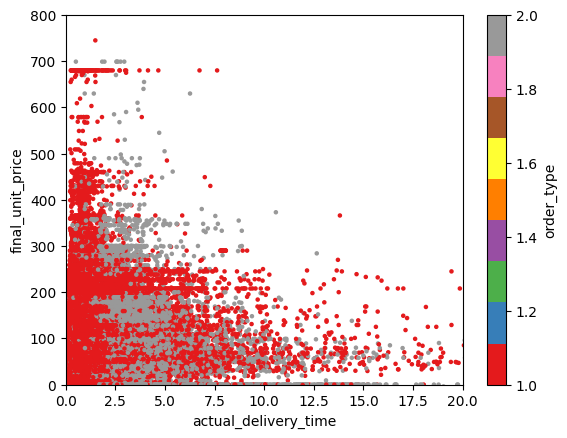

In [33]:
ax = delivery_data.plot.scatter(y='final_unit_price', x='actual_delivery_time', c='order_type', cmap='Set1',s=5)
ax.set_xlim([0, 20])
ax.set_ylim([0, 800])
# delivery_data.head().T

c:\Users\Hannah\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_matplotlib\core.py:1259: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


Text(0.5, 1.0, 'Acutal_delivery_time_1p')

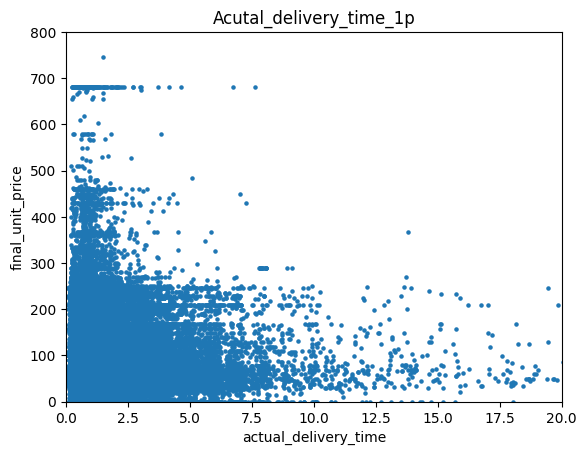

In [38]:
Acutal_delivery_time_1p = delivery_data.query('order_type == 1').plot.scatter(y='final_unit_price', x='actual_delivery_time', cmap='Set1',s=5)
Acutal_delivery_time_1p.set_xlim([0, 20])
Acutal_delivery_time_1p.set_ylim([0, 800])
Acutal_delivery_time_1p.set_title('Acutal_delivery_time_1p')

Text(0.5, 1.0, 'Acutal_delivery_time_3p')

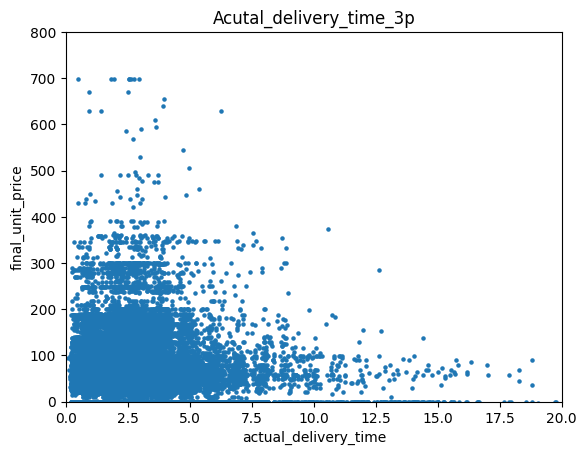

In [39]:
Acutal_delivery_time_3p = delivery_data.query('order_type == 2').plot.scatter(y='final_unit_price', x='actual_delivery_time', cmap='Set1',s=5)
Acutal_delivery_time_3p.set_xlim([0, 20])
Acutal_delivery_time_3p.set_ylim([0, 800])
Acutal_delivery_time_3p.set_title('Acutal_delivery_time_3p')

In [ ]:
#average of actual delivery timem of order by order type
delivery_data.groupby('order_type')['delivered_time_difference'].mean()

In [ ]:
delivery_data['promise'].value_counts()

deliver_data_filter = delivery_data.query('promise != "0"')
deliver_data_filter['promise'] = deliver_data_filter['promise'].astype('int')

In [ ]:
#average of actual delivery timem of order by order type
deliver_data_filter.groupby('order_type')['promise'].mean()

In [ ]:
delivery_data.query('order_ID == "e22627af66"').T

In [ ]:
#The count value of the different type in logistics 
delivery_data['delivery_type'].value_counts().plot(kind='bar')
print(delivery_data['delivery_type'].value_counts())

In [ ]:
delivery_data.to_csv('data.csv')

In [ ]:
#Caculating how many order were delivered within the promise time range and how many fail to meet the promise time range
delivery_data['failed_dt'] = delivery_data['benchmark'].apply(lambda x:"PASS" if float(x) > 0 else "FAIL")
dict(delivery_data['failed_dt'].value_counts())

In [ ]:
#Number of order that were fail to meet the promise time range and its logistic type = 1
delivery_data.query("failed_dt == 'FAIL' & delivery_type == 1")['failed_dt'].value_counts()

In [ ]:
delivery_satisfaction_rate = {"t1_success":(1-(43378/272618))*100,"t0_success":(1-(52221-43378)/54244)*100}
print(delivery_satisfaction_rate)

In [ ]:
#checking if there is JD suppleirs are using 3p logistics
delivery_data.query("order_type == 1 & delivery_type == 0")

In [ ]:
delivery_data['promise'].value_counts()

In [ ]:
#General overview of promise and final_unit_price on each order
delivery_data["promise"]=delivery_data["promise"].astype('str')
plot = delivery_data.plot.scatter(x='promise',y='final_unit_price',)
plot.set_ylim(0,800) 

In [ ]:
#Joining the order data and sku data based on sku_ID
sku_order_data = pd.merge(order_data,sku_data, on =['sku_ID'])
sku_order_data['attribute1'].astype('str')

In [ ]:
#Filtering the data based on the different attribute
sku_order_data_atr1 = sku_order_data.query("attribute1 == '1'")
sku_order_data_atr2 = sku_order_data.query("attribute1 == '2'")
sku_order_data_atr3 = sku_order_data.query("attribute1 == '3'")
sku_order_data_atr4 = sku_order_data.query("attribute1 == '4'")
sku_order_data_atr_unknwon = sku_order_data.query("attribute1 == '-'")

In [ ]:
plot1 = sku_order_data_atr1.plot.scatter(x='promise',y='final_unit_price',)
# plot1.set_ylim(0,600)

In [ ]:
plot2 = sku_order_data_atr2.plot.scatter(x='promise',y='final_unit_price',)
plot2.set_ylim(0,600)

In [ ]:
plot3 = sku_order_data_atr3.plot.scatter(x='promise',y='final_unit_price',)
plot3.set_ylim(0,1000)

In [ ]:
plot4 = sku_order_data_atr4.plot.scatter(x='promise',y='final_unit_price',)
plot4.set_ylim(0,1000)

In [ ]:
plot5 = sku_order_data_atr_unknwon.plot.scatter(x='promise',y='final_unit_price',)
plot5.set_ylim(0,1000)

In [ ]:
order_data.head().T

In [ ]:
#Replace promise in the order data table "-" with 100, easier to filter out
order_data_mod = order_data.replace('-','100')



In [ ]:
#Average promise time
order_data_1 =order_data_mod[(order_data_mod['order_type'] == 1) & (order_data_mod['promise'] != '100')]

mean_t1 = order_data_1['promise'].astype('float').mean()

order_data_2 = order_data_mod[(order_data_mod['order_type'] == 2) & (order_data_mod['promise'] != '100')]

mean_t2 = order_data_2['promise'].astype('float').mean()
print(f'avg for 1p: {mean_t1}')
print(f'avg for 3p: {mean_t2}')

In [ ]:
order_data_1['promise'].value_counts()

In [ ]:
order_data_2['promise'].value_counts()

In [ ]:
#Percentage for unknown_promise_type1_percentage
unknown_promise_t1 = order_data_mod[(order_data_mod['order_type'] == 1)]['promise'].value_counts()['100']
total_count = sum(order_data_mod[(order_data_mod['order_type'] == 1)]['promise'].value_counts()) 
unknown_promise_percentage = (unknown_promise_t1) / total_count * 100
unknown_promise_percentage

In [ ]:
#checking if is same region shipping for those orders without promimse time
#True means same region
#False means from different region
unknown_promise_t1 = order_data_mod[(order_data_mod['order_type'] == 1)]
unknown_promise_t1 = unknown_promise_t1[(unknown_promise_t1['promise'] == '100')]
unknown_promise_t1['difference_in_shipping'] = unknown_promise_t1['dc_ori'] == unknown_promise_t1['dc_des']
unknown_promise_t1['difference_in_shipping'].value_counts()


In [ ]:
print(1-(73/(1241+73)))
print(len(order_data_mod[(order_data_mod['order_type'] == 1)]))
# print(len(order_data_1))
# print(274154+1241+73)
# print(275468*0.0048)

In [ ]:
unknown_promise_t1[unknown_promise_t1['difference_in_shipping']==True].head().T

In [ ]:
#Percentage for unknown_promise_type2_percentage
unknown_promise_t2 = order_data_mod[(order_data_mod['order_type'] == 2)]['promise'].value_counts()['100']
total_count = sum(order_data_mod[(order_data_mod['order_type'] == 2)]['promise'].value_counts()) 
unknown_promise_percentage = (unknown_promise_t2) / total_count * 100
unknown_promise_percentage

In [ ]:
#average promise time especially for same region delivery
order_data_mod3 = order_data_mod[order_data_mod['promise'] != '100']
order_data_mod3['region_difference'] = order_data_mod3['dc_ori'] == order_data_mod3['dc_des']
order_data_mod3 = order_data_mod3[order_data_mod3['region_difference'] == True]
avg_t1 = order_data_mod3[order_data_mod3['order_type']==1]['promise'].astype('int64')
avg_t3 = order_data_mod3[order_data_mod3['order_type']==2]['promise'].astype('int64')
print(f'average for 1p {avg_t1.mean()}')
print(f'average for 3p {avg_t3.mean()}')

In [ ]:
delivery_data[delivery_data['sku_ID'] == 'c98d32ff09']['order_type'].value_counts()

In [ ]:
df1 = delivery_data[['sku_ID','order_type']]
df1.head()
print(df1.value_counts())
# df2 = df1.groupby(['sku_ID','order_type'])
# df2

In [ ]:
# checking if 1 SKU could be both 1p and 3p order
df1.reset_index()
dict_ = {}
dup = []
for index, row in df1.iterrows():
    if row[0] not in dict_:
        dict_[row[0]] = row[1]
    else:
        if dict_[row[0]] != row[1]:
            dup.append(row[0])

In [ ]:
dup
#result shows there is no chance for 1 SKU to be both order types

In [ ]:
# Joining order table and Sku table together
sku_order_data = pd.merge(order_data,sku_data, on =['sku_ID'])

In [ ]:
sku_order_data.head().T

In [ ]:
#
sku_order_data_1 = sku_order_data[['brand_ID','type']]
dict_2 = {}
dup1 = {}
for index, row in sku_order_data_1.iterrows():
    brand_id = row[0]
    type_ = row[1]
    if brand_id not in dup1:
        dup1[brand_id] = {type_:1}
    else:
        if type_ in dup1[brand_id]:
            dup1[brand_id][type_] +=1
        else:
            dup1[brand_id][type_] = 1


In [ ]:
len(set(dup1))

In [ ]:
len(set(list(sku_order_data_1['brand_ID'])))

In [ ]:
dup2 = {}
dup3 = {}
for i in dup1:
    if len(dup1[i]) >1:
        dup2[i] = round(dup1[i][1]/(dup1[i][1] + dup1[i][2]) * 100 ,2)
        dup3[i] = dup1[i]
        



In [ ]:
# brands that can be sold by both 1p and 3p
dup3

In [ ]:
sorted(dup2.items(), key=lambda x: x[1])

In [ ]:
#Brand Analysis - Find average price, average deliver time
#Join Order data with sku data on sku id
brand_data = pd.merge(order_data,sku_data, on =['sku_ID']).replace('-','100')

In [ ]:
common_brand = brand_data[['brand_ID','order_type','final_unit_price']]
common_brand

In [ ]:
common_brand2 = common_brand.groupby(by = ['brand_ID','order_type'])['final_unit_price'].mean()
# common_brand2 = common_brand2.reset_index()
common_brand2 = common_brand2.reset_index()
common_brand2
common_brand2.to_csv('brand_data.csv')
# common_brand2 = common_brand2[common_brand2['brand_ID'].duplicated()]
# common_brand2['order_type'].value_counts()

# common_brand2 =common_brand2.reset_index(name='count').sort_values(by='brand_ID',ascending=False)

In [ ]:
a = (common_brand2['brand_ID'].duplicated())

In [ ]:
brand_data.query('brand_ID == "da5eb98d7d" and final_unit_price < 0').T

In [ ]:
#Distinct Brand (Number of Unique brands)
count = brand_data['brand_ID'].nunique()
print(count)

In [ ]:
brand_data.head().T

In [ ]:
#Average price
avg_prices = brand_data.groupby('brand_ID')['final_unit_price'].mean()
avg_prices

In [ ]:
#Average Delivery time
delivery_data = pd.merge(brand_data, deliver_data, on =['order_ID'])
delivery_data['delivered_time'] = ((delivery_data['arr_time'].astype('datetime64[ns]') - delivery_data['order_time'].astype('datetime64[ns]'))/ pd.Timedelta(hours=1))
delivery_data['delivered_time'] = delivery_data['delivered_time'].astype('float')
avg_delivery_time = delivery_data.groupby('brand_ID')['delivered_time'].mean()
avg_delivery_time = avg_delivery_time.to_frame().reset_index()
avg_delivery_time


In [ ]:
dfs = delivery_data = pd.merge(brand_data, deliver_data, on =['order_ID'])
dfs.query("brand_ID == '3b53572827'")

In [ ]:
filtered_df.head().T

In [ ]:
filtered_df[['brand_ID','final_unit_price','order_type']].query('order_type == 2').groupby(['brand_ID','order_type'])['final_unit_price'].mean().reset_index()

In [ ]:
#Average Delivery time for 1p in terms of brand
avg_delivery_time_1p_each_brand = filtered_df.query("order_type == 1")
avg_delivery_time_1p_each_brand = avg_delivery_time_1p_each_brand.groupby('brand_ID')['delivered_time'].mean()
avg_delivery_time_1p_each_brand = avg_delivery_time_1p_each_brand.to_frame().reset_index()
avg_delivery_time_1p_each_brand.to_csv('1p brand deliver time.csv')



In [ ]:
#Average Delivery time for 3p in terms of brand
avg_delivery_time_3p_each_brand = filtered_df.query("order_type == 2")
avg_delivery_time_3p_each_brand = avg_delivery_time_3p_each_brand.groupby('brand_ID')['delivered_time'].mean()
avg_delivery_time_3p_each_brand = avg_delivery_time_3p_each_brand.to_frame().reset_index()
avg_delivery_time_3p_each_brand.to_csv('3p brand deliver time.csv')


In [ ]:


#Average Delivery time for 1p in terms of brand
avg_delivery_time_1p_each_brand = delivery_data.query("order_type == 1")
avg_delivery_time_1p_each_brand = avg_delivery_time_1p_each_brand.groupby('brand_ID')['delivered_time'].mean()
avg_delivery_time_1p_each_brand = avg_delivery_time_1p_each_brand.to_frame().reset_index()
# avg_delivery_time_1p_each_brand.to_csv('1p brand deliver time.csv')

In [ ]:
delivery_data.query("brand_ID == '3b53572827'").to_csv('DEL_DATA.CSV')

# avg_delivery_time_1p_each_bran1.groupby('brand_ID')['delivered_time'].mean()
# avg_delivery_time_1p_each_brand.query("brand_ID == '3b53572827' and order_type == 1").T


In [ ]:
#Promise time value count for same shipping and shipped address 
#within the same region, promise time could be different
check = order_data[order_data['sku_ID'] == '067b673f2b']
check['shipping_difference'] = abs(order_data['dc_ori']- order_data['dc_des'])
check2 = check[check['shipping_difference'] == 0]
count = check2['promise'].value_counts()
print(count)

In [ ]:
#Promise time value count for different shipping and shipped address 
check = order_data[order_data['sku_ID'] == '067b673f2b']
check['shipping_difference'] = abs(order_data['dc_ori']- order_data['dc_des'])
check2 = check[check['shipping_difference'] != 0]
count = check2['promise'].value_counts()
print(count)

In [ ]:
filtered_brand_id = {'198cec62a1': {2: 8395, 1: 2545},
 '9b0d3a5fc6': {1: 49683, 2: 3040},
 '204dbedf50': {1: 13219, 2: 2},
 '99d41501ff': {1: 47099, 2: 4270},
 'a3f8885e47': {1: 7194, 2: 832},
 '1d78a930c2': {1: 188, 2: 16},
 '4efb032b5a': {2: 10389, 1: 4597},
 '552d09b59c': {1: 1953, 2: 18},
 '7cc01be867': {1: 4575, 2: 467},
 '906d0caa60': {1: 13037, 2: 2957},
 '4f65703579': {1: 2176, 2: 16148},
 '624d4750c3': {1: 891, 2: 30},
 '0b0f75e8d5': {2: 7631, 1: 7444},
 'd3b11464d2': {1: 3550, 2: 1037},
 '5ab8ea8556': {1: 13202, 2: 15637},
 'da5eb98d7d': {1: 3775, 2: 692},
 '8b40ec9ab7': {1: 1694, 2: 5459},
 '3daeabd2ce': {1: 17377, 2: 2504},
 '7b90c9e338': {1: 869, 2: 551},
 'a9d8fd0a21': {1: 5777, 2: 5800},
 'c2e19fe77b': {1: 144, 2: 26},
 '816ac3f3a9': {1: 1617, 2: 144},
 '74d632e731': {1: 450, 2: 64},
 'e0c4997859': {1: 2189, 2: 132},
 '03c4806282': {2: 1969, 1: 750},
 '75411efd6b': {1: 450, 2: 1},
 '3e342224f0': {2: 2628, 1: 5856},
 '95edb60932': {2: 1072, 1: 245},
 '26216ff73f': {2: 367, 1: 43},
 'b7e5c0f937': {2: 1853, 1: 1655},
 '235542bb7b': {1: 941, 2: 2859},
 '43999af013': {1: 13619, 2: 7863},
 'd5b005ca7d': {2: 10, 1: 241},
 '94b4cdec6a': {1: 2136, 2: 338},
 '849303948f': {1: 222, 2: 71},
 '7fcb433bba': {2: 6471, 1: 196},
 'b8942de7b2': {1: 330, 2: 199},
 '88262f1628': {1: 106, 2: 209},
 '787ea7298f': {2: 1010, 1: 5719},
 'a2ff0f7b48': {1: 2661, 2: 558},
 '9b84d6b825': {1: 1088, 2: 40},
 'fd68e214e8': {2: 2211, 1: 1},
 '93905470a7': {1: 448, 2: 303},
 '3500c9fab0': {1: 1811, 2: 142},
 'fbee78d4ae': {1: 1670, 2: 11},
 '1976359719': {1: 298, 2: 10},
 '5a0b271e15': {2: 1219, 1: 444},
 'd31ffa2f4d': {2: 1905, 1: 332},
 '054757964e': {2: 198, 1: 128},
 'bce79eb8bf': {2: 374, 1: 15},
 '3c9be6a0ff': {1: 31, 2: 21},
 '6c61f385fb': {2: 92, 1: 25},
 '11532f4321': {1: 919, 2: 301},
 '930aadba98': {1: 12, 2: 114},
 'f1d00479ef': {2: 1418, 1: 42},
 'fc9c3cb979': {2: 65, 1: 19},
 'a023d9bf1f': {1: 146, 2: 1},
 '042c8894a9': {1: 160, 2: 75},
 'adbd559b78': {2: 776, 1: 2537},
 '31e19a2111': {1: 111, 2: 78},
 'ddb787aeb9': {2: 1756, 1: 154},
 '76a692eab7': {2: 572, 1: 7},
 '3860bee7ce': {2: 232, 1: 155},
 '1e612490cc': {2: 522, 1: 41},
 '7aac002ed6': {1: 73, 2: 79},
 '8368e30fa1': {1: 167, 2: 1},
 '0e55ee273e': {1: 37, 2: 1},
 '5e9c5eb1cf': {1: 4, 2: 3},
 'ab56426464': {1: 15, 2: 24},
 '3e472e2220': {1: 17, 2: 14},
 '3b53572827': {1: 26, 2: 10},
 '1d8b4b4c63': {1: 28, 2: 15},
 '6bbe185453': {1: 81, 2: 9},
 '584523bbde': {2: 7, 1: 1},
 'd2124b2bae': {1: 148, 2: 5},
 'e175e177d8': {2: 737, 1: 156},
 'c72df2a3ec': {1: 6, 2: 3}}

In [ ]:
filtered_brand_id_list = list(filtered_brand_id.keys())


In [ ]:
avg_prices1= avg_prices.to_frame().reset_index()



In [ ]:
avg_prices2 = avg_prices1[avg_prices1['brand_ID'].isin(filtered_brand_id_list)]
avg_prices2

In [ ]:
avg_filter_brand_id = pd.merge(avg_delivery_time,avg_prices2,on = ['brand_ID'])

avg_filter_brand_id = avg_filter_brand_id.rename(columns = {'final_unit_price':'average_unit_price'})


In [ ]:
avg_filter_brand_id['delivered_time'] = avg_filter_brand_id['delivered_time'].apply(lambda x: x.total_seconds() / 3600)
avg_filter_brand_id

In [ ]:
for index, row in avg_filter_brand_id.iterrows():
    print(row['brand_ID'],row['average_unit_price'], row['delivered_time'])

In [ ]:
unknown_promise  = order_data[order_data['promise'] == '-']
a = unknown_promise.groupby(['dc_des'])

In [ ]:
a

In [ ]:
delivery_data.head().T

In [ ]:
#the type of SKU being ordered (type = 1 if it is a 1P SKU and type = 2 if it is a 3P SKU), 
delivery_data_same_region = delivery_data[delivery_data['dc_ori'] == delivery_data['dc_des']]

In [ ]:
delivery_data_same_region.head().T

In [ ]:
#Creating a new column to calculate the difference between arrival time and order time and
#Converting the new column units to hour so it matches so we can compare with the promise column (units in hour)
delivery_data_same_region['actual_delivered_time'] = ((delivery_data_same_region['arr_time'].astype('datetime64[ns]') - delivery_data_same_region['order_time'].astype('datetime64[ns]'))/ pd.Timedelta(hours=1))/24
delivery_data_same_region.head().T


In [ ]:
delivery_data_filtered_first_party = delivery_data_same_region[(delivery_data_same_region['type'] == 1) & (delivery_data_same_region['promise'] != '-')] 
delivery_data_filtered_third_party = delivery_data_same_region[(delivery_data_same_region['type'] == 2) & (delivery_data_same_region['promise'] != '-')]

delivery_data_filtered_first_party['promise'] = delivery_data_filtered_first_party['promise'].astype('float')

delivery_data_filtered_third_party['promise'] = delivery_data_filtered_third_party['promise'].astype('float')

In [ ]:
delivery_data_filtered_first_party_count = delivery_data_same_region[(delivery_data_same_region['type'] == 1) & (delivery_data_same_region['promise'] == '-')] 
delivery_data_filtered_third_party_count = delivery_data_same_region[(delivery_data_same_region['type'] == 2) & (delivery_data_same_region['promise'] == '-')]
print(delivery_data_filtered_first_party_count.shape,delivery_data_filtered_third_party_count.shape)
print(delivery_data_filtered_first_party.shape,delivery_data_filtered_third_party.shape)

In [ ]:
# delivery_data_filtered_t1.dtypes
avg_first_party_promise = delivery_data_filtered_first_party.groupby('dc_ori')['promise','actual_delivered_time'].agg('mean').reset_index()
avg_third_party_promise = delivery_data_filtered_third_party.groupby('dc_ori')['promise','actual_delivered_time'].mean().reset_index()

In [ ]:
avg_first_party_promise